# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# With Raw Data

## Read CSV

In [2]:
product = pd.read_csv("./Data/all_clean_product.csv")
product

,Order_Date,Row_ID,Order_ID,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2020-04-15,13,CA-2017-114412,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,15.552,3.0,0.2,5.4432
1,2020-07-16,24,US-2017-156909,Second Class,SF-20065,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,71.372,2.0,0.3,-1.0196
2,2020-10-19,35,CA-2017-107727,Second Class,MA-17560,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,29.472,3.0,0.2,9.9468
3,2020-09-10,42,CA-2017-120999,Standard Class,LC-16930,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,147.168,4.0,0.2,16.5564
4,2020-09-19,44,CA-2017-139619,Standard Class,ES-14080,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,95.616,2.0,0.2,9.5616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,2020-11-17,9989,CA-2017-163629,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,206.100,5.0,0.0,55.6470
3278,2020-02-26,9991,CA-2017-121258,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,91.960,2.0,0.0,15.6332
3279,2020-02-26,9992,CA-2017-121258,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,258.576,2.0,0.2,19.3932
3280,2020-02-26,9993,CA-2017-121258,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,29.600,4.0,0.0,13.3200


## Check Data

In [3]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_Date    3282 non-null   object 
 1   Row_ID        3282 non-null   int64  
 2   Order_ID      3282 non-null   object 
 3   Ship_Mode     3282 non-null   object 
 4   Customer_ID   3282 non-null   object 
 5   Segment       3282 non-null   object 
 6   Country       3282 non-null   object 
 7   City          3282 non-null   object 
 8   State         3282 non-null   object 
 9   Postal_Code   3282 non-null   int64  
 10  Region        3282 non-null   object 
 11  Product_ID    3282 non-null   object 
 12  Category      3282 non-null   object 
 13  Sub-Category  3282 non-null   object 
 14  Sales         3282 non-null   float64
 15  Quantity      3282 non-null   float64
 16  Discount      3282 non-null   float64
 17  Profit        3282 non-null   float64
dtypes: float64(4), int64(2), obj

## Descriptive Statistc

In [4]:
number_col=product[['Sales','Quantity','Discount','Profit']]
number_col.describe()

,Sales,Quantity,Discount,Profit
count,3282.000000,3282.000000,3282.000000,3282.000000
mean,222.414504,3.764778,0.155734,28.440313
std,587.293491,2.224822,0.206521,242.917649
min,0.444000,1.000000,0.000000,-3839.990400
25%,17.145000,2.000000,0.000000,1.790100
50%,54.352000,3.000000,0.200000,8.351400
75%,206.074800,5.000000,0.200000,28.587900
max,13999.960000,14.000000,0.800000,6719.980800


## Check Correlation Between Variable

In [5]:
corr = number_col.corr(method = 'pearson')
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.191803,-0.033016,0.532639
Quantity,0.191803,1.000000,0.018114,0.053937
Discount,-0.033016,0.018114,1.000000,-0.219366
Profit,0.532639,0.053937,-0.219366,1.000000


### Draw Heatmap

C:\Users\USER\AppData\Local\Temp\ipykernel_34788\1563919299.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(number_col.corr(method = 'pearson'), dtype=np.bool)


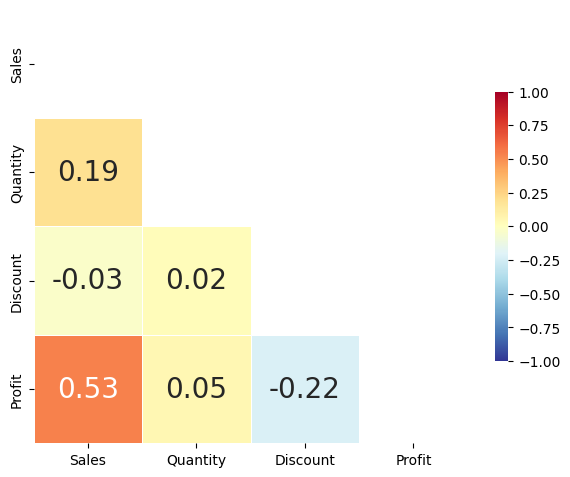

In [6]:
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(number_col.corr(method = 'pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

test_heatmap = sns.heatmap(corr.values,
                          cbar = True,
                           cbar_kws={"shrink": .5},
                           cmap = 'RdYlBu_r',
                           annot = True,
                          annot_kws={'size' : 20},
                           mask=mask,
                           fmt = '.2f',
                           square = 'True',
                           linewidths=.5,
                          yticklabels=number_col.columns,
                          xticklabels=number_col.columns,
                          vmin = -1,vmax = 1)
plt.show()

# With Non-Loss Data

## Read CSV

In [7]:
product_l = pd.read_csv("./Data/all_clean_product_without_loss.csv")
product_l

,Order_Date,Row_ID,Order_ID,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2020-04-15,13,CA-2017-114412,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,15.552,3,0.2,5.4432
1,2020-10-19,35,CA-2017-107727,Second Class,MA-17560,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,29.472,3,0.2,9.9468
2,2020-09-10,42,CA-2017-120999,Standard Class,LC-16930,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,147.168,4,0.2,16.5564
3,2020-09-19,44,CA-2017-139619,Standard Class,ES-14080,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,95.616,2,0.2,9.5616
4,2020-09-14,72,CA-2017-114440,Second Class,TB-21520,Consumer,United States,Jackson,Michigan,49201,Central,OFF-PA-10004675,Office Supplies,Paper,19.050,3,0.0,8.7630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,2020-11-17,9989,CA-2017-163629,Standard Class,RA-19885,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,206.100,5,0.0,55.6470
2649,2020-02-26,9991,CA-2017-121258,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,91.960,2,0.0,15.6332
2650,2020-02-26,9992,CA-2017-121258,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,258.576,2,0.2,19.3932
2651,2020-02-26,9993,CA-2017-121258,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,29.600,4,0.0,13.3200


## Check Data

In [8]:
product_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_Date    2653 non-null   object 
 1   Row_ID        2653 non-null   int64  
 2   Order_ID      2653 non-null   object 
 3   Ship_Mode     2653 non-null   object 
 4   Customer_ID   2653 non-null   object 
 5   Segment       2653 non-null   object 
 6   Country       2653 non-null   object 
 7   City          2653 non-null   object 
 8   State         2653 non-null   object 
 9   Postal_Code   2653 non-null   int64  
 10  Region        2653 non-null   object 
 11  Product_ID    2653 non-null   object 
 12  Category      2653 non-null   object 
 13  Sub-Category  2653 non-null   object 
 14  Sales         2653 non-null   float64
 15  Quantity      2653 non-null   int64  
 16  Discount      2653 non-null   float64
 17  Profit        2653 non-null   float64
dtypes: float64(3), int64(3), obj

## Descriptive Statistc

In [9]:
l_number_col=product_l[['Sales','Quantity','Discount','Profit']]
l_number_col.describe()

,Sales,Quantity,Discount,Profit
count,2653.000000,2653.000000,2653.000000,2653.000000
mean,217.204400,3.788918,0.081323,55.364588
std,599.388594,2.231155,0.099190,221.959760
min,0.990000,1.000000,0.000000,0.100800
25%,17.900000,2.000000,0.000000,5.216400
50%,49.960000,3.000000,0.000000,12.576200
75%,189.000000,5.000000,0.200000,38.988000
max,13999.960000,14.000000,0.400000,6719.980800


In [10]:
df=l_number_col.describe()
df.to_csv('./Data/describe_without_loss.csv')

## Check Correlation Between Variable

In [11]:
corr_l = l_number_col.corr(method = 'pearson')
corr_l

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.185545,-0.013175,0.909441
Quantity,0.185545,1.000000,-0.002231,0.117707
Discount,-0.013175,-0.002231,1.000000,-0.062197
Profit,0.909441,0.117707,-0.062197,1.000000


### Draw Heatmap

C:\Users\USER\AppData\Local\Temp\ipykernel_34788\2866225866.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(number_col.corr(method = 'pearson'), dtype=np.bool)


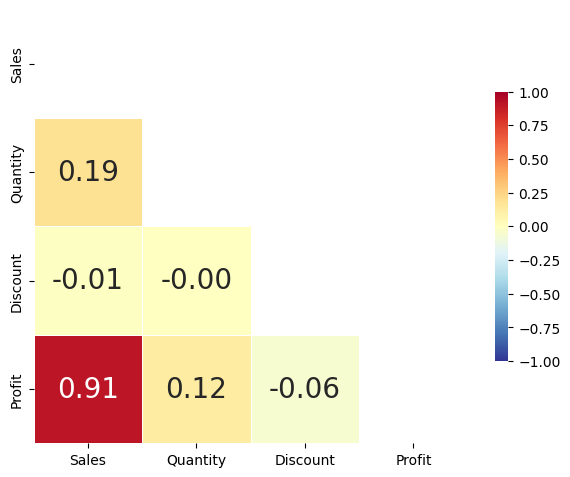

In [12]:
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(number_col.corr(method = 'pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

test_heatmap = sns.heatmap(corr_l.values,
                          cbar = True,
                           cbar_kws={"shrink": .5},
                           cmap = 'RdYlBu_r',
                           annot = True,
                          annot_kws={'size' : 20},
                           mask=mask,
                           fmt = '.2f',
                           square = 'True',
                           linewidths=.5,
                          yticklabels=number_col.columns,
                          xticklabels=number_col.columns,
                          vmin = -1,vmax = 1)
plt.show()

# Detail Analysis

## Profit By State

### Top 10

In [13]:
tops=pd.read_csv('./Data/top10_state.csv')
tops

,state,state_profit,profit_ratio,cumulative_ratio
0,California,29327.8093,19.967,19.967
1,New York,24350.7421,16.578,36.545
2,Washington,17196.7425,11.708,48.253
3,Michigan,8487.7618,5.779,54.032
4,Georgia,6447.9819,4.390,58.422
5,Delaware,6053.2049,4.121,62.543
6,Indiana,5139.5257,3.499,66.042
7,Kentucky,4752.9446,3.236,69.278
8,Maryland,2780.6070,1.893,71.171
9,Minnesota,2457.3733,1.673,72.844


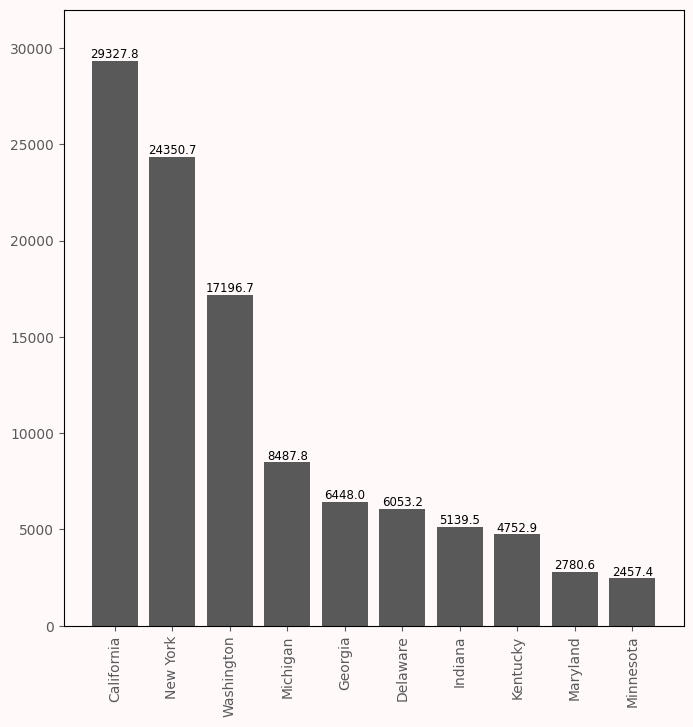

In [14]:
x=tops['state']
y=tops['state_profit']

fig = plt.figure(figsize=(8,8), facecolor='#FFF9FA')
ax = fig.add_subplot()
ax.patch.set_facecolor('#FFF9FA')

bar = plt.bar(x, y,color='#595959')
plt.ylim(0, 32000)
plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='#595959')
plt.tick_params(axis='y', colors='#595959')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 8.5)
        
plt.show()

### With Map

#### Initialize Folium & Read CSV

In [98]:
m = folium.Map(location=[40, -95], zoom_start=3.4)
m

In [83]:
state_data = pd.read_csv('./data/sales_info_with_state_without_loss.csv')
state_data

,state,sales,quantity,profit
0,Alabama,1820.720,56,492.939
1,Arizona,6232.216,145,929.264
2,Arkansas,2590.020,68,900.974
3,California,135344.798,2478,30384.131
4,Colorado,3936.624,134,474.046
5,Connecticut,5307.210,104,1479.762
6,Delaware,13444.540,80,6101.989
7,District of Columbia,77.760,8,35.064
8,Florida,15782.424,266,2035.024
9,Georgia,19160.020,235,6447.982


#### Insert New Column 'st_code' Because Of JSON   ex) Alabama > AL
#### And Drop NaN Row

In [84]:
state=[{"name":"Alabama","abbreviation":"AL"},{"name":"Alaska","abbreviation":"AK"},{"name":"Arizona","abbreviation":"AZ"},{"name":"Arkansas","abbreviation":"AR"},{"name":"California","abbreviation":"CA"},{"name":"Colorado","abbreviation":"CO"},{"name":"Connecticut","abbreviation":"CT"},{"name":"Delaware","abbreviation":"DE"},{"name":"Florida","abbreviation":"FL"},{"name":"Georgia","abbreviation":"GA"},{"name":"Hawaii","abbreviation":"HI"},{"name":"Idaho","abbreviation":"ID"},{"name":"Illinois","abbreviation":"IL"},{"name":"Indiana","abbreviation":"IN"},{"name":"Iowa","abbreviation":"IA"},{"name":"Kansas","abbreviation":"KS"},{"name":"Kentucky","abbreviation":"KY"},{"name":"Louisiana","abbreviation":"LA"},{"name":"Maine","abbreviation":"ME"},{"name":"Maryland","abbreviation":"MD"},{"name":"Massachusetts","abbreviation":"MA"},{"name":"Michigan","abbreviation":"MI"},{"name":"Minnesota","abbreviation":"MN"},{"name":"Mississippi","abbreviation":"MS"},{"name":"Missouri","abbreviation":"MO"},{"name":"Montana","abbreviation":"MT"},{"name":"Nebraska","abbreviation":"NE"},{"name":"Nevada","abbreviation":"NV"},{"name":"New Hampshire","abbreviation":"NH"},{"name":"New Jersey","abbreviation":"NJ"},{"name":"New Mexico","abbreviation":"NM"},{"name":"New York","abbreviation":"NY"},{"name":"North Carolina","abbreviation":"NC"},{"name":"North Dakota","abbreviation":"ND"},{"name":"Ohio","abbreviation":"OH"},{"name":"Oklahoma","abbreviation":"OK"},{"name":"Oregon","abbreviation":"OR"},{"name":"Pennsylvania","abbreviation":"PA"},{"name":"Rhode Island","abbreviation":"RI"},{"name":"South Carolina","abbreviation":"SC"},{"name":"South Dakota","abbreviation":"SD"},{"name":"Tennessee","abbreviation":"TN"},{"name":"Texas","abbreviation":"TX"},{"name":"Utah","abbreviation":"UT"},{"name":"Vermont","abbreviation":"VT"},{"name":"Virginia","abbreviation":"VA"},{"name":"Washington","abbreviation":"WA"},{"name":"West Virginia","abbreviation":"WV"},{"name":"Wisconsin","abbreviation":"WI"},{"name":"Wyoming","abbreviation":"WY"}]


In [85]:
state_data.insert(1,'st_code',np.nan)

for i in range(len(state_data)):
    for j in range(len(state)):
        if state_data['state'][i]==state[j]['name']:
            state_data['st_code'][i]=state[j]['abbreviation']
state_data

C:\Users\USER\AppData\Local\Temp\ipykernel_34788\3382352446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['st_code'][i]=state[j]['abbreviation']


,state,st_code,sales,quantity,profit
0,Alabama,AL,1820.720,56,492.939
1,Arizona,AZ,6232.216,145,929.264
2,Arkansas,AR,2590.020,68,900.974
3,California,CA,135344.798,2478,30384.131
4,Colorado,CO,3936.624,134,474.046
5,Connecticut,CT,5307.210,104,1479.762
6,Delaware,DE,13444.540,80,6101.989
7,District of Columbia,NaN,77.760,8,35.064
8,Florida,FL,15782.424,266,2035.024
9,Georgia,GA,19160.020,235,6447.982


In [86]:
state_data.drop([7], axis=0, inplace=True)
state_data = state_data.reset_index(drop=True)
state_data

,state,st_code,sales,quantity,profit
0,Alabama,AL,1820.720,56,492.939
1,Arizona,AZ,6232.216,145,929.264
2,Arkansas,AR,2590.020,68,900.974
3,California,CA,135344.798,2478,30384.131
4,Colorado,CO,3936.624,134,474.046
5,Connecticut,CT,5307.210,104,1479.762
6,Delaware,DE,13444.540,80,6101.989
7,Florida,FL,15782.424,266,2035.024
8,Georgia,GA,19160.020,235,6447.982
9,Idaho,ID,1233.548,26,199.009


#### Add Layer & Visualization

In [87]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data"
)
state_geo = f"{url}/us-states.json"

In [99]:
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["st_code", "profit"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Profit",
).add_to(m)

folium.LayerControl().add_to(m)

m

## Profit By Sub Category

In [22]:
topc=pd.read_csv('./Data/top10_subcategory.csv')
topc

,Sub-Category,category_profit,profit_ratio,cumulative_ratio
0,Copiers,25031.7902,17.042,17.042
1,Accessories,15662.9489,10.664,27.706
2,Phones,12684.6090,8.636,36.342
3,Paper,12109.1129,8.244,44.586
4,Appliances,7865.2683,5.355,49.941
5,Binders,7640.1358,5.202,55.143
6,Chairs,7635.4502,5.198,60.341
7,Storage,7272.0003,4.951,65.292
8,Furnishings,4114.4280,2.801,68.093
9,Art,2219.4575,1.511,69.604


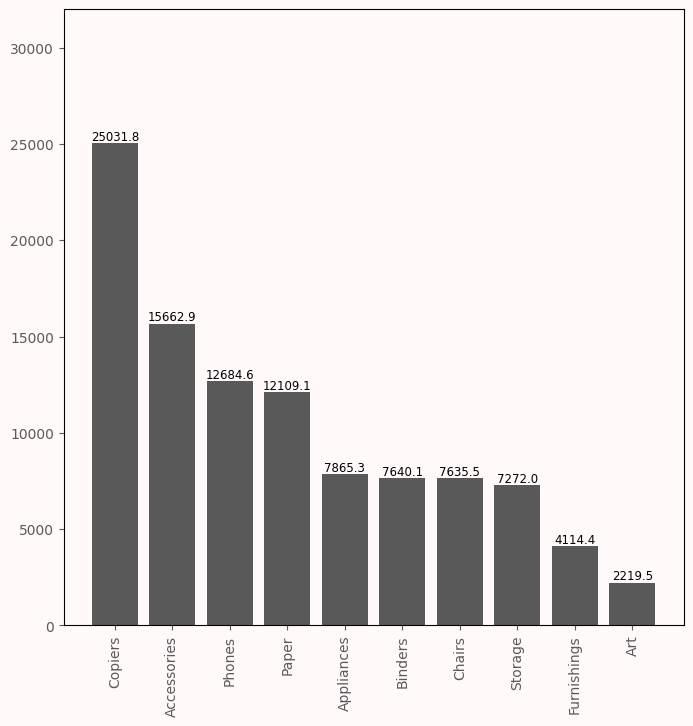

In [23]:
x=topc['Sub-Category']
y=topc['category_profit']

fig = plt.figure(figsize=(8,8), facecolor='#FFF9FA')
ax = fig.add_subplot()
ax.patch.set_facecolor('#FFF9FA')

bar = plt.bar(x, y,color='#595959')
plt.ylim(0, 32000)
plt.xticks(rotation=90)
plt.tick_params(axis='x', colors='#595959')
plt.tick_params(axis='y', colors='#595959')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 8.5)
        
plt.show()

## Retention & Cohort Analysis

### Retention

#### With Ratio

In [24]:
cohort_ratio=pd.read_csv('./Data/cohort_table_ratio.csv', index_col='first_order')
cohort_ratio

,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2020-01,1.0,0.0323,0.1226,0.1548,0.1097,0.0387,0.1742,0.0968,0.2129,0.1355,0.2129,0.2839
2020-02,1.0,0.0707,0.1111,0.1616,0.2222,0.1313,0.1515,0.3030,0.2121,0.2727,0.3232,0.0000
2020-03,1.0,0.1274,0.1604,0.1179,0.1274,0.0896,0.3962,0.1604,0.2453,0.2594,0.0000,0.0000
2020-04,1.0,0.1844,0.2340,0.2057,0.1489,0.3972,0.2411,0.2695,0.4184,0.0000,0.0000,0.0000
2020-05,1.0,0.1370,0.2123,0.2192,0.2192,0.1233,0.4110,0.2466,0.0000,0.0000,0.0000,0.0000
2020-06,1.0,0.0763,0.2366,0.2977,0.2443,0.2366,0.2595,0.0000,0.0000,0.0000,0.0000,0.0000
2020-07,1.0,0.1910,0.3034,0.2697,0.2022,0.2135,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-08,1.0,0.3731,0.1493,0.3134,0.3582,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-09,1.0,0.1136,0.2197,0.1591,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


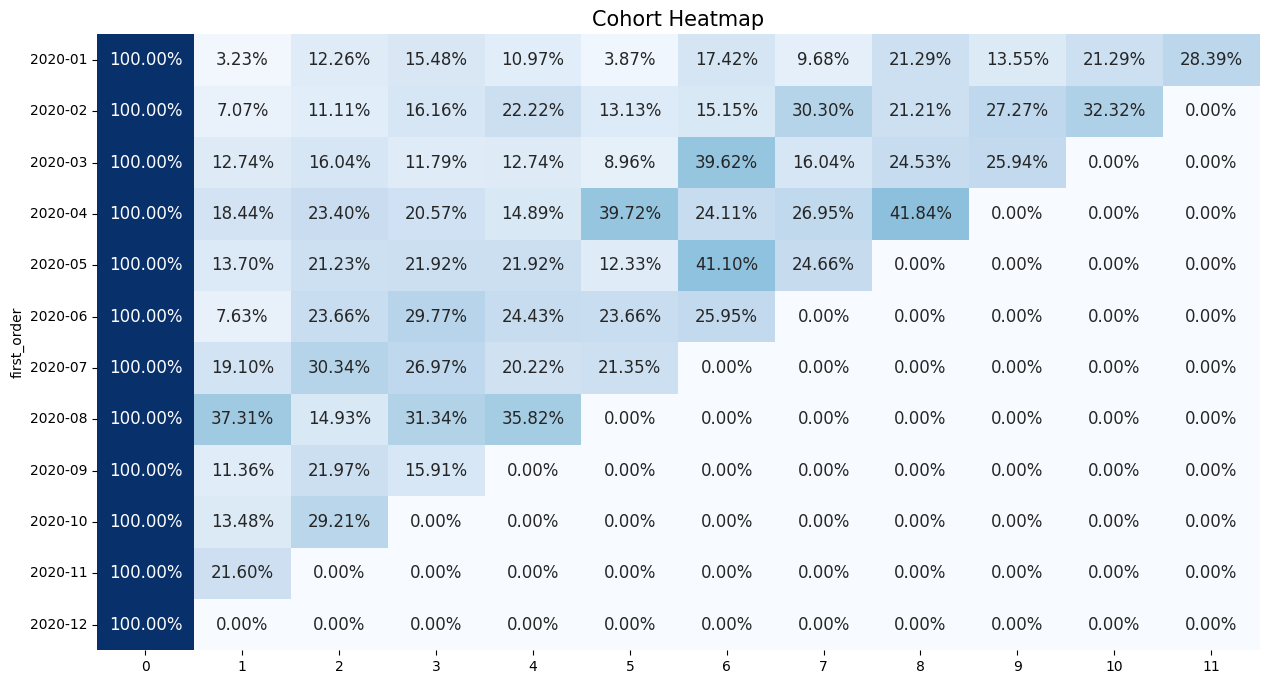

In [25]:
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize = (15, 8))

sns.heatmap(cohort_ratio, cmap = 'Blues', annot = True,
            fmt = '.2%', annot_kws = {'fontsize': 12}, cbar = False,
            ax = ax)


plt.title('Cohort Heatmap', fontsize=15)
plt.yticks(rotation = 0)
plt.show()

#### With Value

In [26]:
cohort=pd.read_csv('./Data/cohort_table.csv', index_col='first_order')
cohort

,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2020-01,155,5,19,24,17,6,27,15,33,21,33,44
2020-02,99,7,11,16,22,13,15,30,21,27,32,0
2020-03,212,27,34,25,27,19,84,34,52,55,0,0
2020-04,141,26,33,29,21,56,34,38,59,0,0,0
2020-05,146,20,31,32,32,18,60,36,0,0,0,0
2020-06,131,10,31,39,32,31,34,0,0,0,0,0
2020-07,89,17,27,24,18,19,0,0,0,0,0,0
2020-08,67,25,10,21,24,0,0,0,0,0,0,0
2020-09,132,15,29,21,0,0,0,0,0,0,0,0


In [27]:
cus_diff={'month_gap':[c for c in cohort.columns],
          'customer_gap':[sum(cohort[m]) for m in cohort.columns]}
cus_df=pd.DataFrame(cus_diff)
cus_df.set_index('month_gap',inplace=True)
cus_df

,customer_gap
month_gap,
0,1470
1,191
2,251
3,231
4,193
5,162
6,254
7,153
8,165


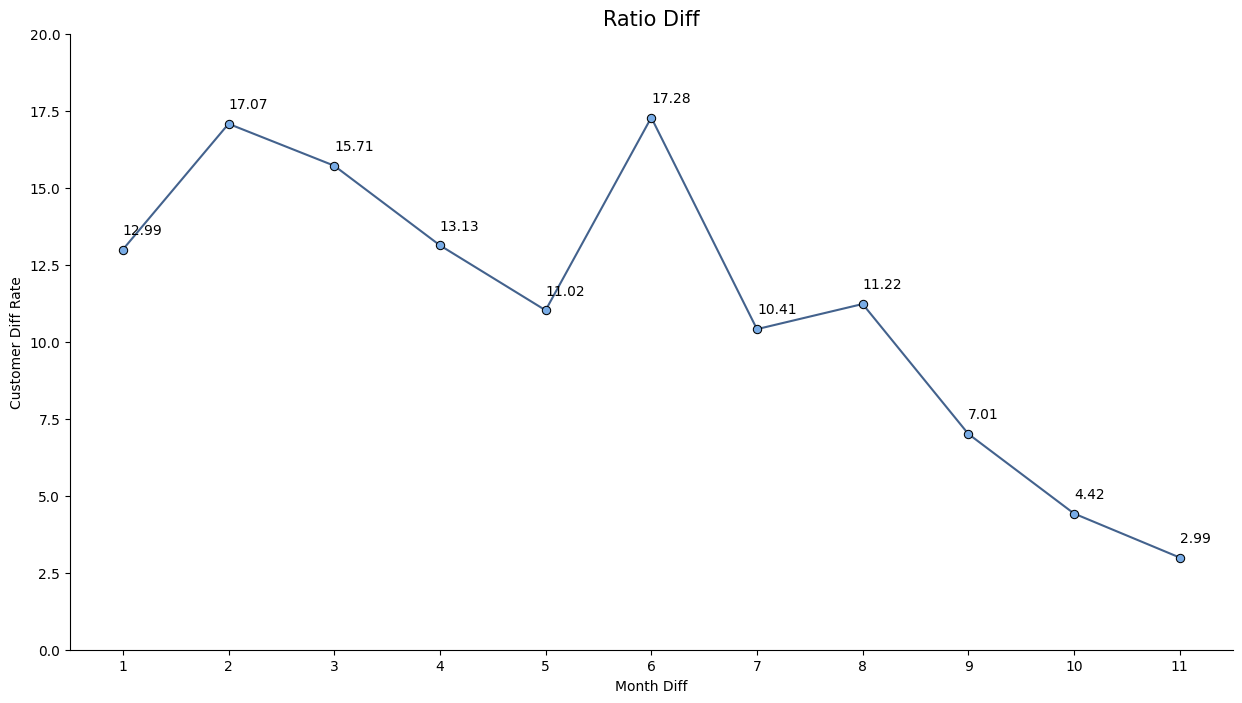

In [28]:
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize = (15, 8))
ax.grid(False)
x = cus_df.index[1:]
y = 100*(cus_df['customer_gap'][1:] / cus_df['customer_gap'][0])

sns.lineplot(x = x, y = y, color = '#43628d', marker = 'o', markerfacecolor = '#79ace6', markeredgecolor = '#000000')

for x, y in zip(x, y):
    plt.text(x, y +0.5, s = round(y, 2))

plt.xlabel('Month Diff')
plt.ylabel('Customer Diff Rate')
plt.title('Ratio Diff', fontsize=15)
plt.ylim(0,20)
sns.despine()
plt.show()

## Classify Sub Category

In [78]:
sub_ca = pd.read_csv('./data/sub_ca.csv')
sub_ca

,Sub-Category,quantity,profit,pbyq
0,Copiers,73,25031.7902,342.901
1,Machines,86,6609.1605,76.851
2,Chairs,365,10951.8541,30.005
3,Tables,126,2823.1544,22.406
4,Binders,1198,23402.4435,19.535
5,Appliances,555,10502.2869,18.923
6,Phones,896,15707.6028,17.531
7,Bookcases,142,2405.2881,16.939
8,Accessories,983,15924.5673,16.200
9,Storage,817,9038.8021,11.063


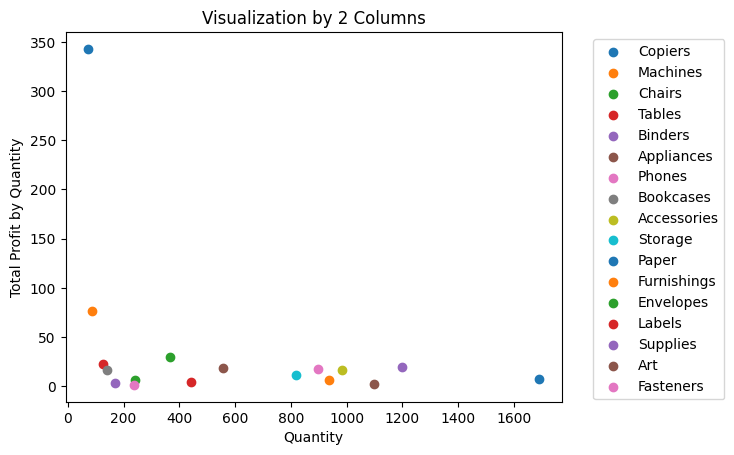

In [79]:
x = sub_ca['quantity']
y = sub_ca['pbyq']
for i in range(len(sub_ca)):
    plt.scatter(x[i], y[i],label=sub_ca['Sub-Category'][i])


plt.xlabel('Quantity')
plt.ylabel('Total Profit by Quantity')
plt.title('Visualization by 2 Columns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.show()

In [80]:
sub_ca_a=sub_ca[['quantity','pbyq']]
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(sub_ca_a)
sub_ca_a = pd.DataFrame(Dataset, index=sub_ca_a.index,
                              columns=sub_ca_a.columns)

sub_ca_a

,quantity,pbyq
0,0.000000,1.000000
1,0.008040,0.221188
2,0.180581,0.084055
3,0.032777,0.061810
4,0.695733,0.053406
5,0.298083,0.051614
6,0.508967,0.047540
7,0.042672,0.045807
8,0.562771,0.043643
9,0.460111,0.028606


### Clustering With KMeans

In [81]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(sub_ca_a)

sub_ca_a['cluster']=kmeans.labels_
sub_ca.insert(4,'Cluster',sub_ca_a['cluster'])
sub_ca_a

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,quantity,pbyq,cluster
0,0.000000,1.000000,2
1,0.008040,0.221188,1
2,0.180581,0.084055,1
3,0.032777,0.061810,1
4,0.695733,0.053406,0
5,0.298083,0.051614,1
6,0.508967,0.047540,0
7,0.042672,0.045807,1
8,0.562771,0.043643,0
9,0.460111,0.028606,0


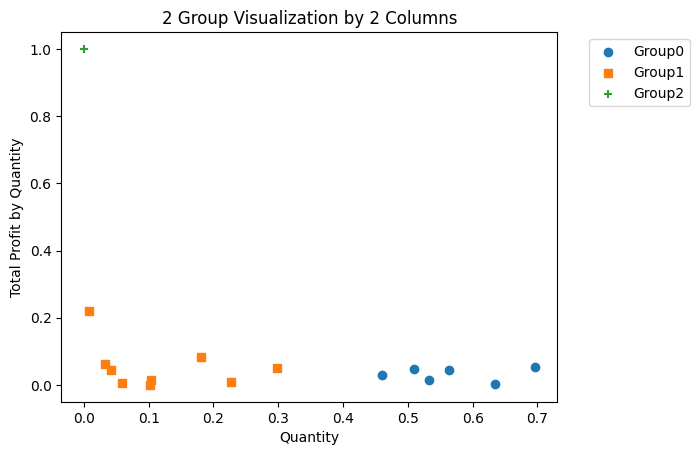

In [82]:
marker_idx=[sub_ca_a[sub_ca_a['cluster']==i].index for i in range(3)]
marker={0:'o',1:'s',2:'+',3:'v'}
label=['Group0','Group1','Group2','Group3']

for i in range(3):
    plt.scatter(x=sub_ca_a.loc[marker_idx[i],'quantity'],
                y=sub_ca_a.loc[marker_idx[i],'pbyq'],
                label=label[i],
                marker=marker[i]) 

plt.xlabel('Quantity')
plt.ylabel('Total Profit by Quantity')
plt.title('2 Group Visualization by 2 Columns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Cohort Analysis By Cluster

In [46]:
re_subcote=pd.read_csv('./Data/twocluster_rt.csv')
re_subcote

,cluster,1,2,3,4,5,6,7,8,9,10,11
0,0,0.1343,0.1791,0.1219,0.1294,0.0871,0.1741,0.1045,0.102,0.0398,0.0398,0.0224
1,1,0.1209,0.1593,0.1529,0.1218,0.0962,0.1548,0.0861,0.098,0.0687,0.0385,0.0284


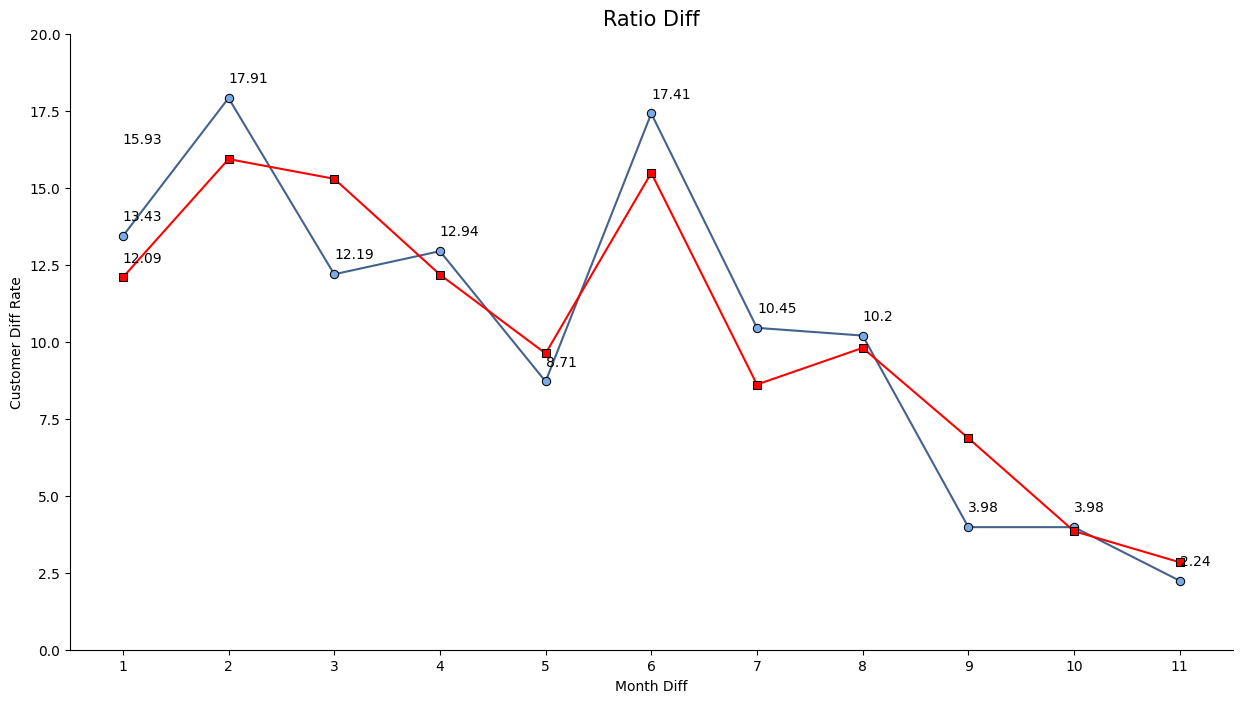

In [47]:
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize = (15, 8))
ax.grid(False)
x = [m for m in re_subcote.columns[1:]]
y = re_subcote.loc[0][1:]*100
z = re_subcote.loc[1][1:]*100
# w = re_subcote.loc[2][1:]*100

sns.lineplot(x = x, y = y, color = '#43628d', marker = 'o', markerfacecolor = '#79ace6', markeredgecolor = '#000000')
sns.lineplot(x = x, y = z, color = 'r', marker = 's', markerfacecolor = 'r', markeredgecolor = '#000000')
# sns.lineplot(x = x, y = w, color = 'g', marker = '+', markerfacecolor = 'g', markeredgecolor = '#000000')

for x, y in zip(x, y):
    plt.text(x, y +0.5, s = round(y, 2))
for x, y in zip(x, z):
    plt.text(x, y +0.5, s = round(y, 2))
# for x, y in zip(x, w):
#     plt.text(x, y +0.5, s = round(y, 2))
    
plt.xlabel('Month Diff')
plt.ylabel('Customer Diff Rate')
plt.title('Ratio Diff', fontsize=15)
plt.ylim(0,20)
sns.despine()
plt.show()